# ADR Data Validation

This notebook demonstrates how to:
1. Load ADR data and create a sixdegrees configuration
2. Initialize and validate the array setup
3. Analyze waveform coherence using cross-correlation


In [1]:
from obspy import UTCDateTime
from sixdegrees.sixdegrees import sixdegrees

## 1. Load Configuration and Setup

First, we have to import the configuariont for the ADR data. We created the configuration file using the **seismicarray.save_config_for_sixdegrees** function.

In [2]:
config = sixdegrees.load_from_yaml('./config/config_adr.yml')

Now we initialize a sixdegrees object based on the configuration.

In [3]:
sd = sixdegrees(config)

As we know this example is an 8.8 event, we provide the relevant origin time and magnitude to obtain the event information.

In [4]:
ev = sd.get_event_info(
    base_catalog='USGS',
    origin_time='2025-07-29 23:24:00',
    magnitude=8.8
)

## 2. Load Waveform Data

Now we'll load our waveform data.


In [5]:
sd.load_data(config['tbeg'], config['tend'])

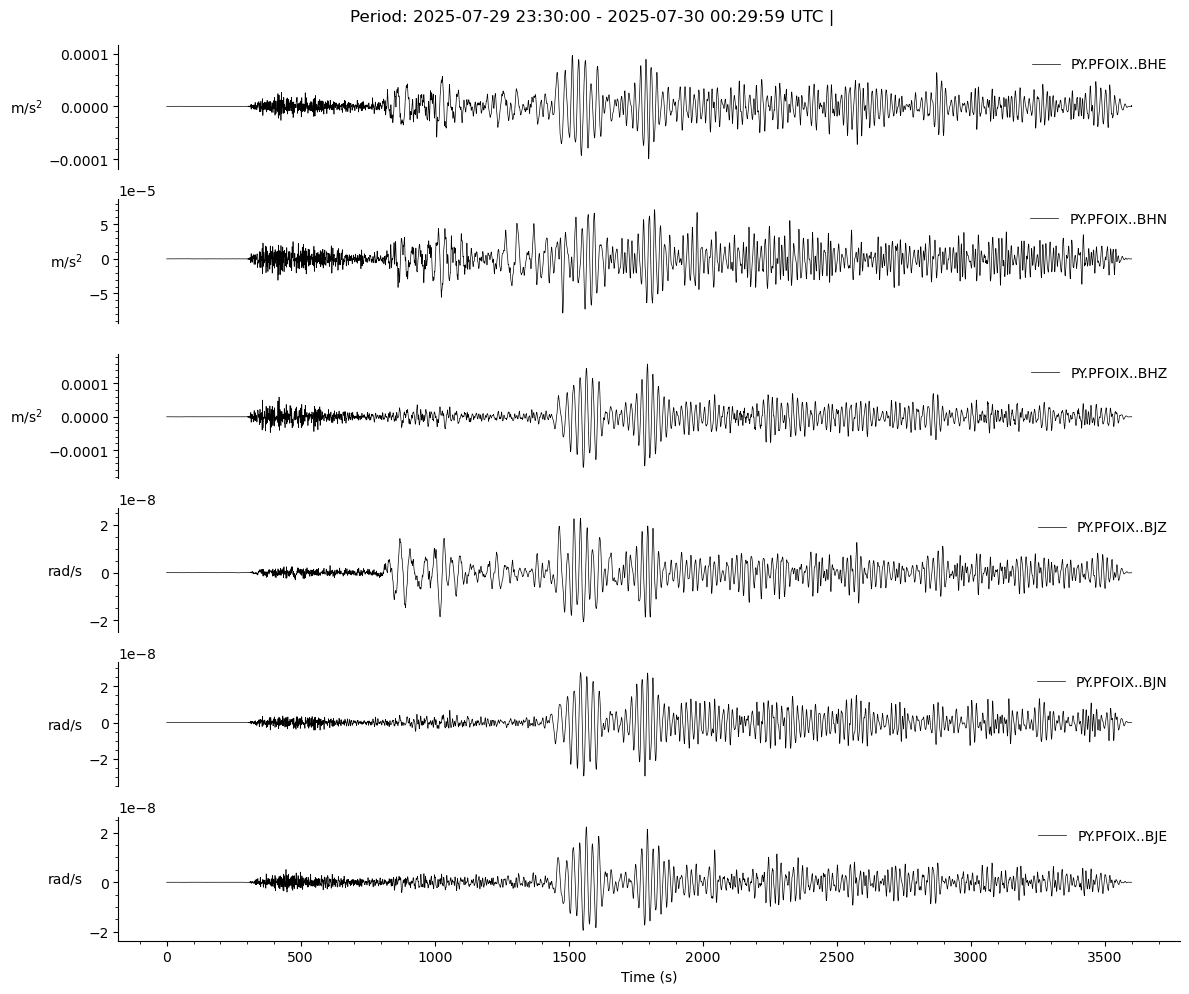

In [6]:
fig = sd.plot_waveforms()

## 3. Waveform Cross-Correlation Analysis



First, a change in polarity is required for the vertical translational acceleration data and vertical rotation rate data.

In [18]:
sd.polarity_stream({"HZ":-1, "JZ":-1})

-> polarity already applied. Exiting...


In [19]:
sd.filter_data(fmin=0.01, fmax=0.1)

In [20]:
sd.trim(UTCDateTime(config['tbeg'])+700, UTCDateTime(config['tend'])-1500)

Let's analyze the waveform component correlations


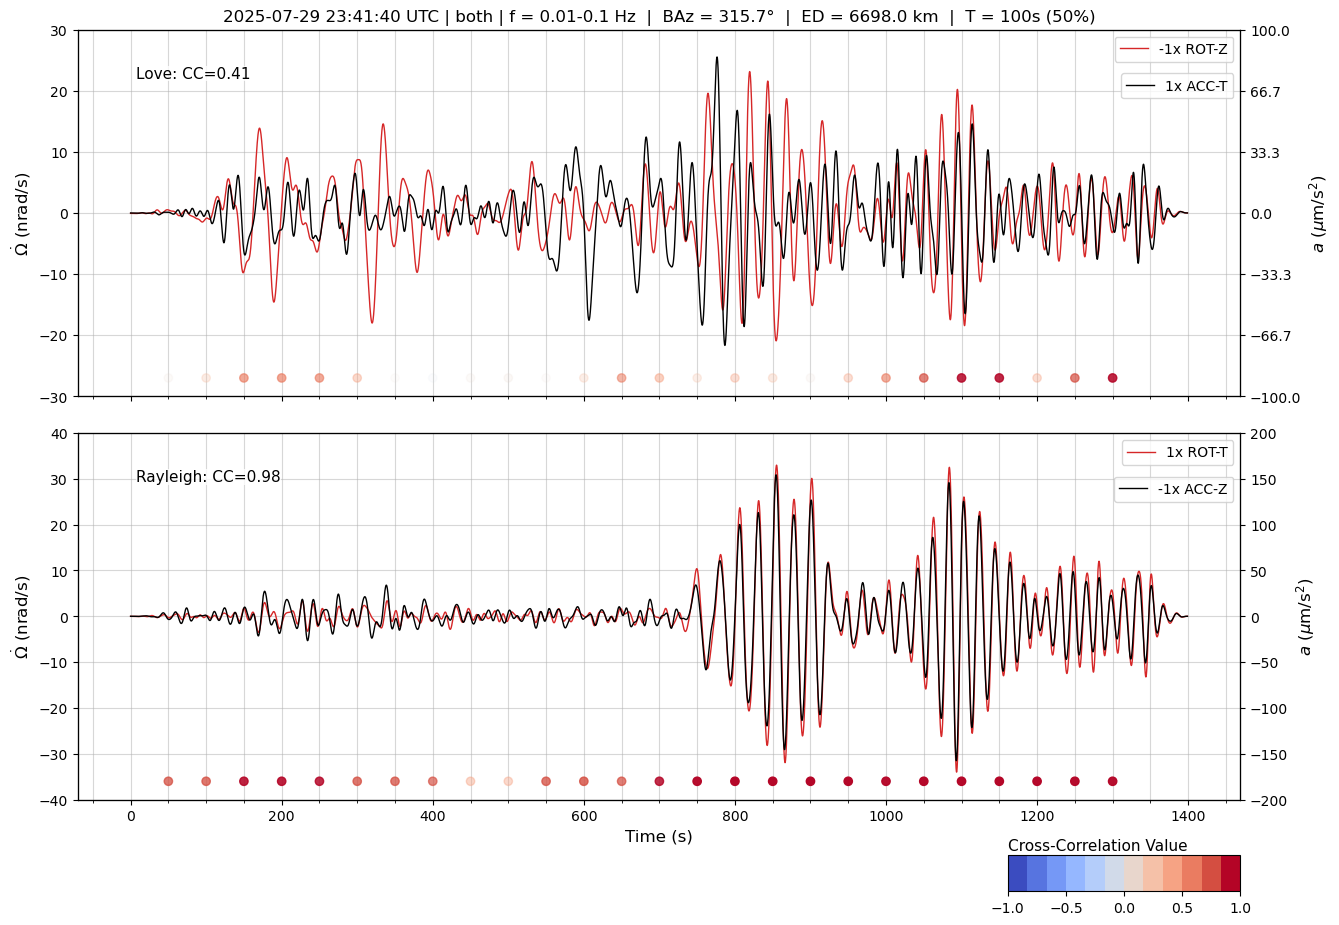

In [21]:
fig = sd.plot_waveform_cc(
    twin_sec=100,
    twin_overlap=0.5,
    wave_type="both"
)


Find (and correct) time lag between translation and rotation data


In [ ]:
sd.get_component_lag(
    normalize=True,
    baz=ev['backazimuth'],
    correct=False)



ROT-T & ACC-Z:  lag_time: -0.475 s, lag_samples: -19, cc_max: 0.99
ROT-Z & ACC-T:  lag_time: -8.15 s, lag_samples: -326, cc_max: -0.61
